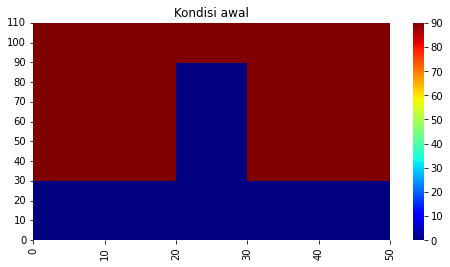

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# parameter awal
m  = 10**(-6)
dx = 1*m
dy = 1*m
t1 = 20*m
t  = 60*m
t2 = 30*m
H  = t1 + t + t2
l  = 20*m
w  = 10*m
L  = l + w + l
nx = int(L/dx)
ny = int(H/dy)
x1 = int(l/dx)     
x2 = int((l+w)/dx)
x3 = int(nx)       
y1 = int(t2/dy)    
y2 = int((t2+t)/dy)
y3 = int(ny)       
T  = np.zeros((ny, nx))  # array kosong

# kondisi suhu awal
# sisi atas core
for j in range(x1, x2):
  i = y2
  T[i, j] = 90

# sisi atas kiri substrat
for j in range(0, x1):
  i = y1
  T[i, j] = 90

# sisi atas kanan substrat
for j in range(x2, nx):
  i = y1
  T[i, j] = 90

# sisi kanan core
for i in range(y1, y2):
  j = x2
  T[i, j] = 90 

# cladding bottom plate
for j in range(0, nx):
  i = 0
  T[i, j]=0

# cladding atas
for i in range(y2, y3):
  for j in range(0, x3):
   T[i, j] = 90

# cladding kiri
for i in range(y1, y2):
  for j in range(0, x1):
    T[i, j] = 90

# cladding kanan
for i in range(y1, y2):
   for j in range(x2, x3):
     T[i, j] = 90

# plotting 
plt.figure(figsize=(8, 4))
yticklabels = np.arange(0, ny+10, 10)
xticklabels = np.arange(0, nx+10, 10)
yticks = np.arange(0, ny+10, 10)
xticks = np.arange(0, nx+10, 10)
ax = sns.heatmap(T, cmap="jet", yticklabels=yticklabels, 
                 xticklabels=xticklabels)
ax.invert_yaxis() 
ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.set_title("Kondisi awal")
plt.show()

In [160]:
# penerapan metode beda hingga
def fdm(T, max_iter=1000):
  """
  Menghitung turunan kedua dengan metode beda hingga (finite diference method).
  Parameters
  ----------
  T : array 2 dimensi
  max_iter : banyak iterasi yang diinginkan. Default = 1000  iterasi

  """
  size = T.shape
  x = size[1]
  y = size[0]
  for k in range(max_iter):
    for i in range(1, y-1):
      for j in range(1, x-1):
        T[i, j] = 1/4 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])
  return T

suhu = np.zeros((5, 5))
suhu[:, 0]  = 20  # kiri
suhu[:, -1] = 20  # kanan
suhu[-1, :] = 20  # bawah
suhu[0, :]  = 400 # atas 
penelitian = fdm(suhu)
penelitian = np.round_(penelitian, 3)
penelitian = penelitian[1:-1, 1:-1]
penelitian

array([[182.857, 220.179, 182.857],
       [ 91.25 , 115.   ,  91.25 ],
       [ 47.143,  57.321,  47.143]])

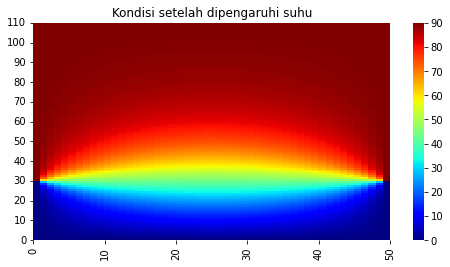

In [161]:
# perhitungan dengan 10000 iterasi
temperatur = fdm(T, max_iter=10000)

# plotting
plt.figure(figsize=(8, 4))
yticklabels = np.arange(0, ny+10, 10)
xticklabels = np.arange(0, nx+10, 10)
yticks = np.arange(0, ny+10, 10)
xticks = np.arange(0, nx+10, 10)
ax = sns.heatmap(temp, cmap="jet", yticklabels=yticklabels, 
                 xticklabels=xticklabels)
ax.invert_yaxis() 
ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.set_title("Kondisi setelah dipengaruhi suhu")
plt.show()